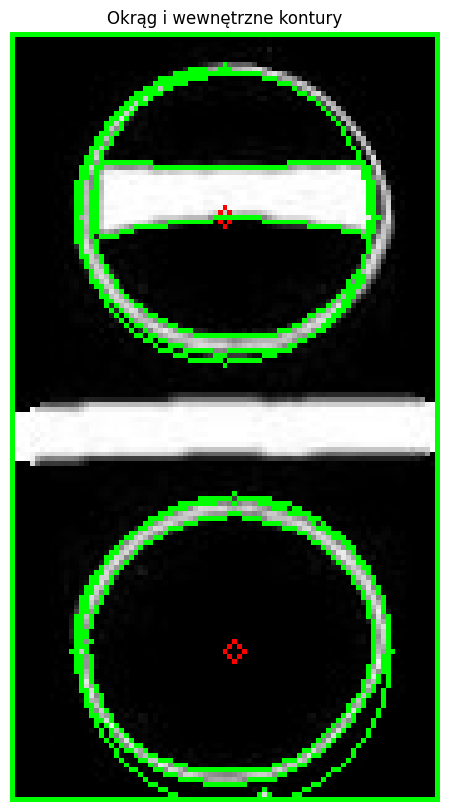

In [10]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = 'scheme014.jpg'
image = cv2.imread(image_path)


if image is None:
    raise FileNotFoundError(f"Obraz nie został znaleziony w ścieżce: {image_path}")


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


filtered = cv2.medianBlur(gray, 5)


circles = cv2.HoughCircles(filtered, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=50, param2=30, minRadius=20, maxRadius=100)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
       
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 1)
    
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 1)
        
        
        mask = np.zeros_like(gray)
        cv2.circle(mask, (i[0], i[1]), i[2], 255, thickness=-1)
    
        masked_image = cv2.bitwise_and(gray, gray, mask=mask)
        _, binary = cv2.threshold(masked_image, 127, 255, cv2.THRESH_BINARY_INV)
        contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
     
        for contour in contours:
            cv2.drawContours(image, [contour], -1, (0, 255, 0), 1)


plt.figure(figsize=(10, 10))
plt.title('Okrąg i wewnętrzne kontury')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
